In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import shapely

In [2]:
# Bad maps from French governement with rotated overseas territories
# 2020-04-19 https://www.dailymotion.com/video/x7tezzk 19:15
# 2020-10-22 https://twitter.com/JeanCASTEX/status/1319293473225273344
# 2021-02-25 https://youtu.be/_gVzmK-IXNE?t=524
# 2020-10-15 https://www.youtube.com/watch?v=5Xks0GFVbDI

In [3]:
DATA_FR_OM_REGION = "data/regions-avec-outre-mer.geojson"

In [4]:
df = gpd.read_file(DATA_FR_OM_REGION)

df['centroid'] = df.apply(lambda x: x['geometry'].centroid, axis=1)
idf_centroid = df.loc[df.code == "11"]['centroid'][0]
df['area'] = df.area
df = df.sort_values(by='area', ascending=False)
df['rank'] = df[['area']].rank(ascending=False).astype(int)

# let's translate them toward the chosen point
df['dist_lon'] = df.apply(lambda x: idf_centroid.x - x.centroid.x, axis=1)
df['dist_lat'] = df.apply(lambda x: idf_centroid.y - x.centroid.y, axis=1)
df['geometry'] = df.apply(lambda x: shapely.affinity.translate(x.geometry, x.dist_lon, x.dist_lat), axis=1)

/home/glefait/.virtualenvs/notebooks/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/tmp/ipykernel_251438/3694024010.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['area'] = df.area
/home/glefait/.virtualenvs/notebooks/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/home/glefait/.virtualenvs/notebooks/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecation

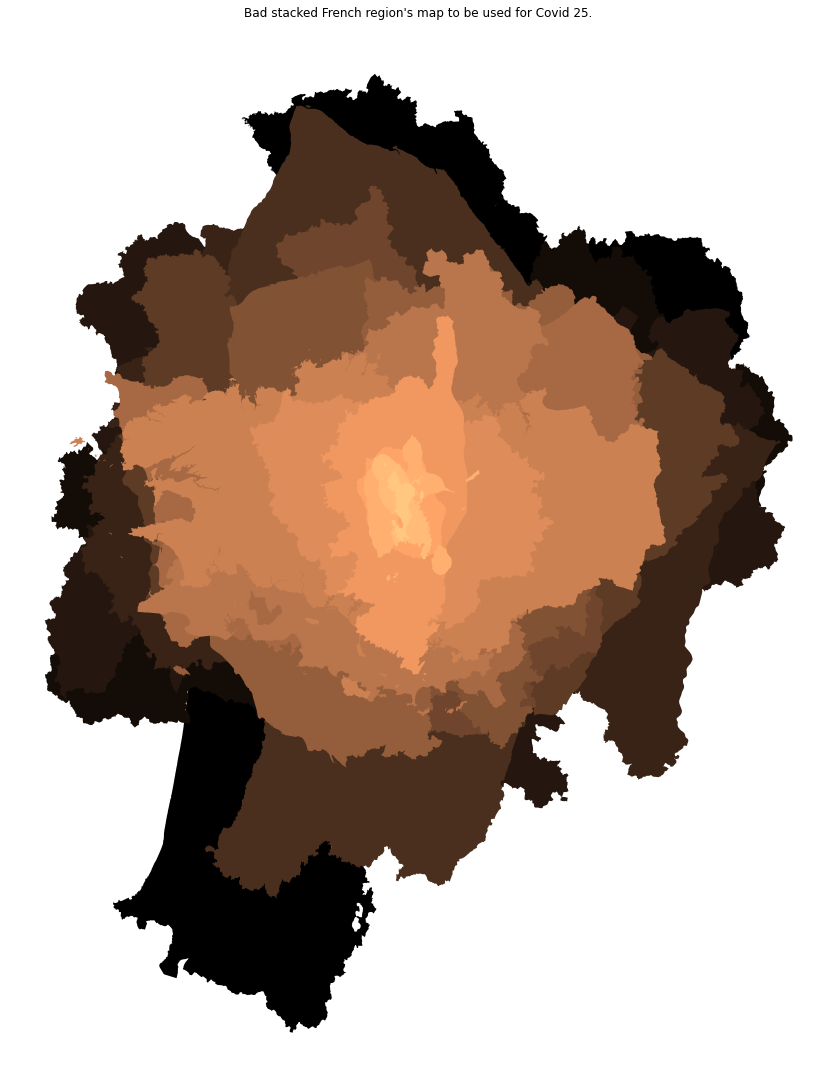

In [5]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(15, 15))
fig.suptitle("Bad stacked French region's map to be used for Covid 25.")
df.plot(ax=ax, column='rank', cmap='copper', legend=False, alpha=1) # other interesting palettes: hot, afmhot, jet
_ = ax.axis('off')

fig.savefig('output/2022-11-10.png', facecolor='white')